### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
dataset = pd.read_csv(r"dataset - house pricing.csv", index_col=0)
dataset.head()
data = dataset.copy()

### EDA

In [3]:
dataset.shape

(6347, 18)

In [4]:
dataset.info()  #location is the only variable that is categorical

<class 'pandas.core.frame.DataFrame'>
Index: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   int64

In [5]:
dataset.isna().any()

Price                   False
Area                    False
Location                False
No. of Bedrooms         False
New/Resale              False
Gymnasium               False
Lift Available          False
Car Parking             False
Maintenance Staff       False
24x7 Security           False
Children's Play Area    False
Clubhouse               False
Intercom                False
Landscaped Gardens      False
Indoor Games            False
Gas Connection          False
Jogging Track           False
Swimming Pool           False
dtype: bool

In [6]:
dataset.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print("Correlation of all independent variables with the dependent variable:--") 
correlation_matrix = dataset.select_dtypes(include=['number']).corr()
correlation_matrix.iloc[:, 0].sort_values(ascending=False)

Correlation of all independent variables with the dependent variable:--


Price                   1.000000
Area                    0.722336
No. of Bedrooms         0.594865
Swimming Pool           0.123902
Indoor Games            0.122352
Gas Connection          0.118245
Gymnasium               0.098097
Clubhouse               0.084775
Lift Available          0.083656
Landscaped Gardens      0.082225
Intercom                0.063060
Car Parking             0.055221
Children's Play Area    0.045126
24x7 Security           0.045107
Jogging Track           0.042325
New/Resale              0.032428
Maintenance Staff       0.027604
Name: Price, dtype: float64

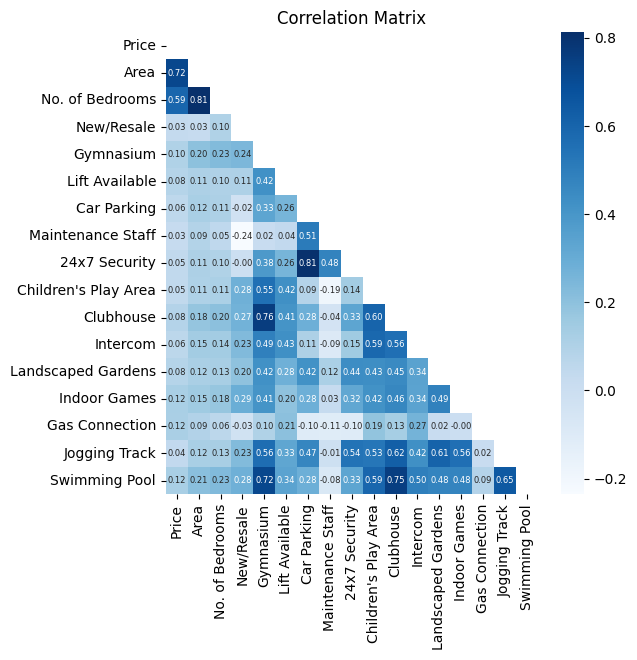

In [8]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            annot_kws={"size":6},
            cmap='Blues', 
            fmt='.2f', 
            mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)))
plt.title("Correlation Matrix")
plt.show()

In [9]:
pd.set_option('display.max_rows', None)
dataset.groupby('Location')['Swimming Pool'].value_counts()

Location                                Swimming Pool
15th Road                               0                  1
4 Bunglows                              0                  2
Adaigaon                                0                  1
Agripada                                1                  1
Airoli                                  0                 24
                                        1                  4
Akurli Nagar                            0                  1
Almeida Park                            0                  2
Ambarnath                               0                  3
                                        1                  1
Ambernath East                          0                 11
                                        1                  4
Ambernath West                          0                 11
                                        1                  4
Ambivali                                0                  1
Ambivli                        

In [10]:
dataset = dataset[['Location', 'Area', 'No. of Bedrooms', 'Price']]

#### Resampling and necessary changes in Location variable

In [11]:
dataset['Location'] = np.where(dataset['Location'].str.startswith('Sector'), 
                               dataset['Location'].apply(lambda x: x.split(' ')[-1]), 
                               dataset['Location'])
dataset['Location'] = dataset['Location'].str.title()

In [12]:
dataset.shape

(6347, 4)

In [13]:
filtered_location = [loc for loc,count in dataset["Location"].value_counts().to_dict().items() if count < 11]
filtered_location
dataset = dataset[~dataset["Location"].isin(filtered_location)]
dataset.shape

(5672, 4)

In [14]:
dataset['Location'].value_counts()

Location
Kharghar                605
Thane West              418
Mira Road East          390
Ulwe                    384
Borivali West           176
Kalyan West             176
Nala Sopara             172
Malad West              163
Andheri West            161
Kamothe                 149
Powai                   141
Kandivali East          141
Panvel                  137
Chembur                 135
Kandivali West          115
Virar                   107
Goregaon West            86
Malad East               85
Andheri East             83
Mulund West              76
Taloja                   66
Goregaon East            64
Ville Parle East         63
Boisar                   61
Dahisar                  58
Naigaon East             55
Seawoods                 45
Dombivali                44
Borivali East            43
Vasai                    41
Badlapur East            40
Ghatkopar West           39
Juhu                     36
Sanpada                  34
Ghansoli                 34
Magathane  

#### Outlier Treatment

In [15]:
# creating a new column of price per sqft so that we can remove the outlier for price 
dataset['price_per_sqft'] = dataset['Price'] / dataset['Area']

In [16]:
# calculating the z-score for area and price per sqft 
df = pd.DataFrame()
for key, data in dataset.groupby('Location'):  #getting the data on the basis of location
    mean = np.mean(data.price_per_sqft) #mean
    std = np.std(data.price_per_sqft) #std
    data['z-score (price_per_sqft)'] = (data['price_per_sqft'] - mean)/ std  # z-score calculation for price per sqft
    mean = np.mean(data.Area) #mean
    std = np.std(data.Area) #std
    data['z-score (Area)'] = (data['Area'] - mean)/ std  # z-score calculation for area
    df = pd.concat([df, data]) # concating the df into the main dataframe 

In [17]:
# removing the outlier based on z-score
df = df[((np.abs(df['z-score (price_per_sqft)'] < 3)) & (np.abs(df['z-score (Area)']) < 3))]

In [18]:
# filtering the dataset with necessary columns
dataset = df[['Price', 'Location', 'Area', 'No. of Bedrooms']]
dataset.reset_index(drop=True, inplace=True)

In [19]:
dataset.shape

(5553, 4)

In [20]:
columns_for_location = [loc for loc in dataset.columns.to_list() if loc.startswith('Location_')]

In [21]:
dataset[columns_for_location] = dataset[columns_for_location].astype(int)

#### Spliting the data 

In [22]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#### Creating the XGBoost model - the parameters is already tuned in v1 

In [24]:
#importing all the necessary libraries

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# KFold cross validation
kfold = KFold(n_splits=5)

# Instantiate the Target Encoder and XGBRegressor
te = TargetEncoder()
XGB = XGBRegressor(learning_rate=0.020697959367203873, 
            max_depth= 4, 
            n_estimators= 502,
            subsample= 0.8798369178174535, 
            )

# Create a pipeline
pipe = Pipeline(
[
    ("te", te),
    ("XGB", XGB),
]
)

# Grid to serch for the hyper parameters
pipe_grid = {
"te__smoothing":[100],
}

# Instantiate the grid
pipe_cv = GridSearchCV(
pipe,
param_grid=pipe_grid,
n_jobs=-1,
cv=kfold,
)

# fit the model
pipe_cv.fit(X_train, y_train)

# Predict the target on test and train data
test_preds = pipe_cv.predict(X_test)
train_preds = pipe_cv.predict(X_train)

# Calculate R2 score on training data
r2_train = r2_score(y_train, train_preds)

# Calculate R2 score on test data
r2_test = r2_score(y_test, test_preds)

# Print the results
print(f"R2 on Training Data: {r2_train}")
print(f"R2 on Test Data: {r2_test}")

R2 on Training Data: 0.9325259394342358
R2 on Test Data: 0.8907809366651754


c:\Users\Rishika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
